# Digit Recognizer

#### The objective of this notebook is to present a solution for Kaggle's digit recognizer competition using Artificial Neural Networks.


In [1]:
# Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from IPython.display import Image

In [2]:
## Reading the data
train = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Digit Recognizer/train.csv')

In [3]:
# Dimensions of training dataset
train.shape

(42000, 785)

In [4]:
# Observing some training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Checking if we have any missing values
sum(train.isnull().sum())

0

In [6]:
# Reading the test file
test = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Digit Recognizer/test.csv')

In [7]:
# Dimensions of test data
test.shape

(28000, 784)

In [8]:
# Check for missing values in the test data
sum(test.isnull().sum())

0

In [9]:
y_train = np.array(train['label'])
X_train = train.drop(['label'], axis=1)

In [10]:
# unique label values
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# One hot encoding, we have 10 digits sequentially from 0 to 9 in y_train, which means we can use an array of size 10
# for one hot encoding (index of the lista array is the value present in the y_train)
lista = [0]*10
y_train_encoding = []
for i in y_train:
  lista[i] = 1
  y_train_encoding.append(lista)
  lista = 10*[0]

In [12]:
y_train_encoding = np.array(y_train_encoding)
y_train_encoding

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

### Artificial Neural Network

In [13]:
# Building the network
model = Sequential()
# Input layer
model.add(Dense(350, activation='relu', input_shape = (784, )))
model.add(BatchNormalization())
# Hidden layers
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
# Output layer
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### The neural network built above has 7 dense layers, and in all these layers with the exception of the last one, the activation function is relu. In the last layer the activation function is softmax, as our task is multi category classification task and this function will give the probability of each class. Finally the chosen optimizer is adam.

In [14]:
# Creating a checkpoint to save the model weights that lead to the highest validation accuracy
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', save_best_only=True)

In [15]:
# Forcing the model to stop when 5 epochs have passed without increasing the validation accuracy value
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [17]:
# Training the neural network 
history = model.fit(X_train, y_train_encoding, epochs=40, validation_split= 0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/40
1050/1050 [==============================] - 11s 9ms/step - loss: 0.5329 - accuracy: 0.8604 - val_loss: 0.1897 - val_accuracy: 0.9462
Epoch 2/40
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2237 - accuracy: 0.9361 - val_loss: 0.1302 - val_accuracy: 0.9629
Epoch 3/40
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1688 - accuracy: 0.9518 - val_loss: 0.1316 - val_accuracy: 0.9627
Epoch 4/40
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1355 - accuracy: 0.9606 - val_loss: 0.1240 - val_accuracy: 0.9644
Epoch 5/40
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1205 - accuracy: 0.9632 - val_loss: 0.1151 - val_accuracy: 0.9668
Epoch 6/40
1050/1050 [==============================] - 10s 9ms/step - loss: 0.1022 - accuracy: 0.9699 - val_loss: 0.0975 - val_accuracy: 0.9727
Epoch 7/40
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0899 - accuracy: 0.9726 - val_loss: 0.1187 - val_accur

In [18]:
# Higher validation accuracy value
max(history.history['val_accuracy'])

0.9763095378875732

In [19]:
# Number of epochs
n_epochs = len(history.history['val_accuracy'])
n_epochs

14

In [20]:
# Saving the weights that generate the highest validation accuracy
model.load_weights('weights.hdf5')

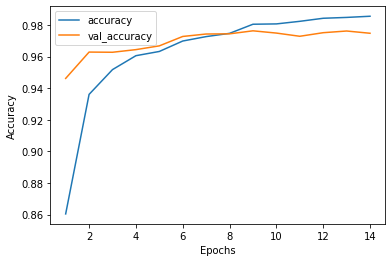

In [21]:
plt.plot(list(range(1, n_epochs + 1)), history.history['accuracy'], label='accuracy')
plt.plot(list(range(1, n_epochs + 1)), history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Submission to Kaggle

In [22]:
X_test = np.array(test)
predictions = np.argmax(model.predict(X_test), axis=-1)

In [23]:
test['label'] = predictions
test['ImageId'] = list(range(1, 28001))

In [24]:
# test[['ImageId', 'Label']].to_csv('submissions.csv', index=False)